In [1]:
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#lectura y carga de datos del dataset
data = pd.read_csv("Adidas_Data.csv")
#Veamos las primeras y ultimas 5 filas del dataset para observar su estructura y variables
data.head() 

,Date,Adj_Close,Close,High,Low,Open,Volume
0,2006-05-31,19.954313,24.9625,24.9750,24.962500,24.9625,28000
1,2006-06-01,19.834412,24.8125,24.8125,24.812500,24.8125,1600
2,2006-06-02,20.214109,25.2875,25.2875,25.250000,25.2875,1600
3,2006-06-05,20.184134,25.2500,25.2500,25.250000,25.2500,2000
4,2006-06-06,19.534645,24.4375,24.6500,24.075001,24.4375,10400


In [2]:
data.tail()

,Date,Adj_Close,Close,High,Low,Open,Volume
4674,2024-12-24,122.980003,122.980003,124.580002,119.279999,121.930000,19600
4675,2024-12-26,124.099998,124.099998,124.839996,121.699997,122.239998,19400
4676,2024-12-27,122.709999,122.709999,123.680000,122.330002,123.370003,124000
4677,2024-12-30,122.389999,122.389999,124.050003,121.080002,121.750000,66500
4678,2024-12-31,121.769997,121.769997,122.930000,120.900002,122.690002,27300


In [3]:
#A continuación, se observará el tipo de datos correspondiente a cada una de las variables
data.dtypes

Date          object
Adj_Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object

In [4]:
#Para ver si hay datos faltantes se utiliza la función isna() que categoriza como valor true a las celdas con datos NA
data.isna()

,Date,Adj_Close,Close,High,Low,Open,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4674,False,False,False,False,False,False,False
4675,False,False,False,False,False,False,False
4676,False,False,False,False,False,False,False
4677,False,False,False,False,False,False,False


In [5]:
#Para ver que sucede en todo el dataset se suman los valores true (faltantes) de toda la tabla
data.isna().sum()

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [6]:
data["Date"] = pd.to_datetime(data["Date"])
data.dtypes

Date         datetime64[ns]
Adj_Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
dtype: object

In [7]:
#se procedera a identificar Outliers en el precio diario de apertura y cierre de las acciones, 
#que podrian afectar de manera negativa a la predicción futura. El método escogido para
#encontrar los outliers es el de cálculo de la variable estandarizada

data["Adj_Close_Standard"] = (data["Adj_Close"] - np.mean(data["Adj_Close"])) / np.std(data["Adj_Close"])
data["Open_Standard"] = (data["Open"] - np.mean(data["Open"])) / np.std(data["Open"])
data

,Date,Adj_Close,Close,High,Low,Open,Volume,Adj_Close_Standard,Open_Standard
0,2006-05-31,19.954313,24.962500,24.975000,24.962500,24.962500,28000,-1.044893,-1.036651
1,2006-06-01,19.834412,24.812500,24.812500,24.812500,24.812500,1600,-1.047431,-1.039832
2,2006-06-02,20.214109,25.287500,25.287500,25.250000,25.287500,1600,-1.039393,-1.029760
3,2006-06-05,20.184134,25.250000,25.250000,25.250000,25.250000,2000,-1.040028,-1.030555
4,2006-06-06,19.534645,24.437500,24.650000,24.075001,24.437500,10400,-1.053777,-1.047784
...,...,...,...,...,...,...,...,...,...
4674,2024-12-24,122.980003,122.980003,124.580002,119.279999,121.930000,19600,1.136175,1.019567
4675,2024-12-26,124.099998,124.099998,124.839996,121.699997,122.239998,19400,1.159885,1.026140
4676,2024-12-27,122.709999,122.709999,123.680000,122.330002,123.370003,124000,1.130459,1.050102
4677,2024-12-30,122.389999,122.389999,124.050003,121.080002,121.750000,66500,1.123684,1.015750


In [49]:
Out_Close = data["Adj_Close_Standard"]>=3
print(sum(Out_Close))

0


In [50]:
Out_Open = data["Open_Standard"]>=3
print(sum(Out_Open))

0


In [59]:
if sum(Out_Close) == 0 and sum(Out_Open) == 0:
    print("No se detectaron Outliers en el set de datos")
else:
    print("Se han detectado " + (sum(Out_Close) + sum(Out_Open)) + "Outliers")

No se detectaron Outliers en el set de datos


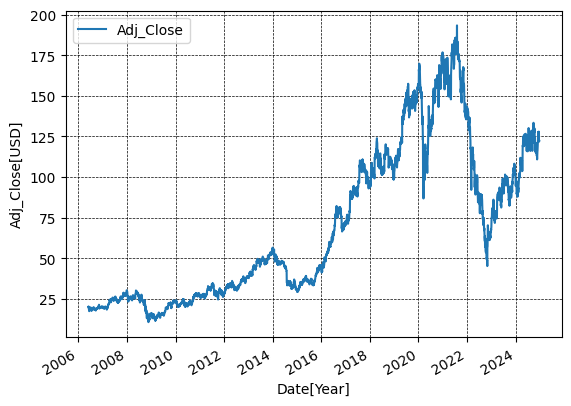

In [66]:
#Elaboración de un gráfico de linea para observar la evolucion en el tiempo del precio de
#cierre de las acciones de Adidas

data.plot(x = "Date", y = "Adj_Close", kind = "line")
plt.xlabel("Date[Year]")
plt.ylabel("Adj_Close[USD]")
plt.grid(True, which='both', color='black', linestyle='--', linewidth=0.5)

In [67]:
#Dado que por año hay alrededor de 365 datos de cada variable, se procedió a extraer el año de cada una de las fechas 
#presentes en el dataset, para luego agrupar los valores de cierre ajustados (Adj_Close)
#correspondientes a un mismo año, calcular el valor medio de esa variablepara cada año y luego representar 
#el valor medio de cierre de cada año en un gràfico de lineas, para compararlo con la visualización
#antes construida.
data["Year"] = data["Date"].dt.year
data.dtypes

C:\Users\creac\AppData\Local\Temp\ipykernel_10188\2742194444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Year"] = data["Date"].dt.year


Date                    datetime64[ns]
Adj_Close                      float64
Close                          float64
High                           float64
Low                            float64
Open                           float64
Volume                           int64
Adj_Close_Standard             float64
Open_Standard                  float64
Year                             int32
Adj_Close_Prediction           float64
dtype: object

In [68]:
Annual_Adj_Close = data.groupby(["Year"], as_index = False ).agg({"Adj_Close":"mean"})
Annual_Adj_Close

,Year,Adj_Close
0,2006,19.142993
1,2007,23.844187
2,2008,22.957393
3,2009,17.514338
4,2010,23.573541
5,2011,28.951881
6,2012,33.804415
7,2013,46.970536
8,2014,41.988622
9,2015,36.840054


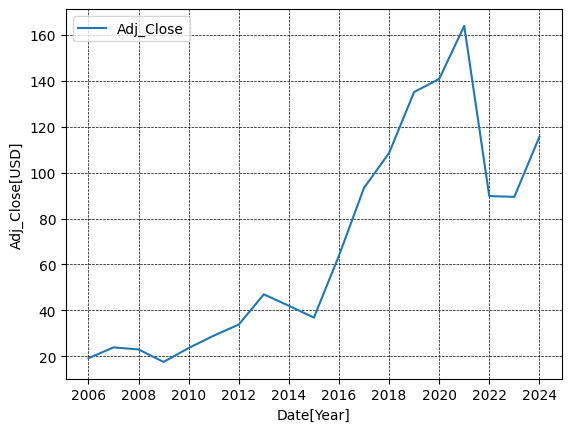

In [72]:
Annual_Adj_Close.plot(x = "Year", y = "Adj_Close", kind = "line")
plt.xlabel("Date[Year]")
plt.ylabel("Adj_Close[USD]")
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid(True, which='both', color='black', linestyle='--', linewidth=0.5)


In [75]:
#Crear variable objetivo a corto/mediano plazo
data["Adj_Close_Prediction"] = data["Adj_Close"].shift(-5)  # Precio de cierre ajustado 5 días a futuro
data = data.dropna(subset=["Adj_Close_Prediction"])

In [76]:
correlation_matrix = data[['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Adj_Close_Prediction']].corr()

In [77]:
correlation_matrix['Adj_Close_Prediction'].sort_values(ascending=False)

Adj_Close_Prediction    1.000000
Adj_Close               0.996776
High                    0.995848
Close                   0.995813
Open                    0.995655
Low                     0.995641
Volume                  0.051549
Name: Adj_Close_Prediction, dtype: float64

<Axes: >

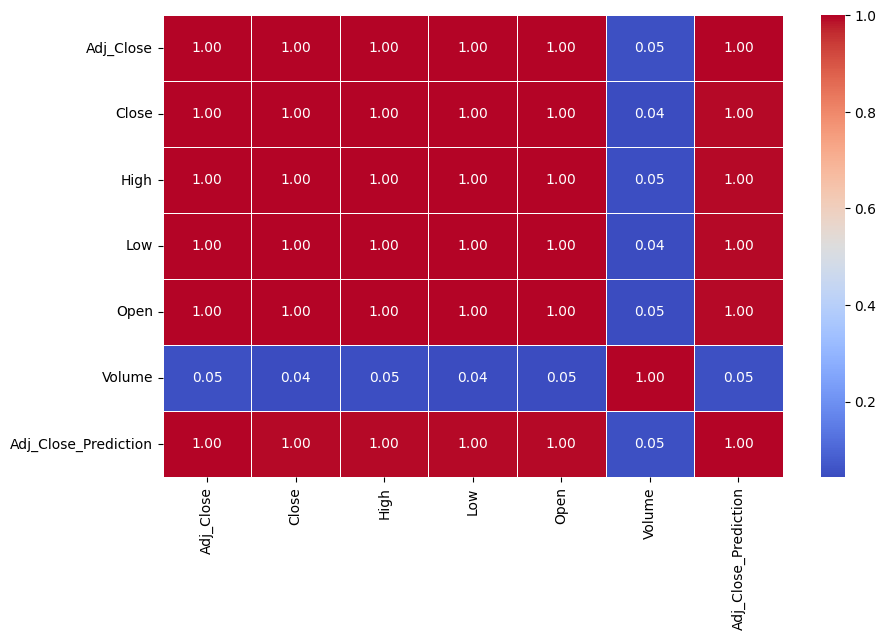

In [78]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [79]:
# Variables predictoras y objetivo
X = data[['Adj_Close', 'High', 'Close', 'Open', 'Low']]
y = data['Adj_Close_Prediction']
# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
model = LinearRegression()

# Acumuladores
all_y_true = []
all_y_pred = []
all_dates = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Acumular valores de este bloque
    all_y_true.extend(y_test.values)
    all_y_pred.extend(y_pred)
    all_dates.extend(data['Date'].iloc[test_index])

# Convertir a arrays
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)
all_dates = pd.to_datetime(all_dates)
error_abs = np.abs(all_y_pred - all_y_true)

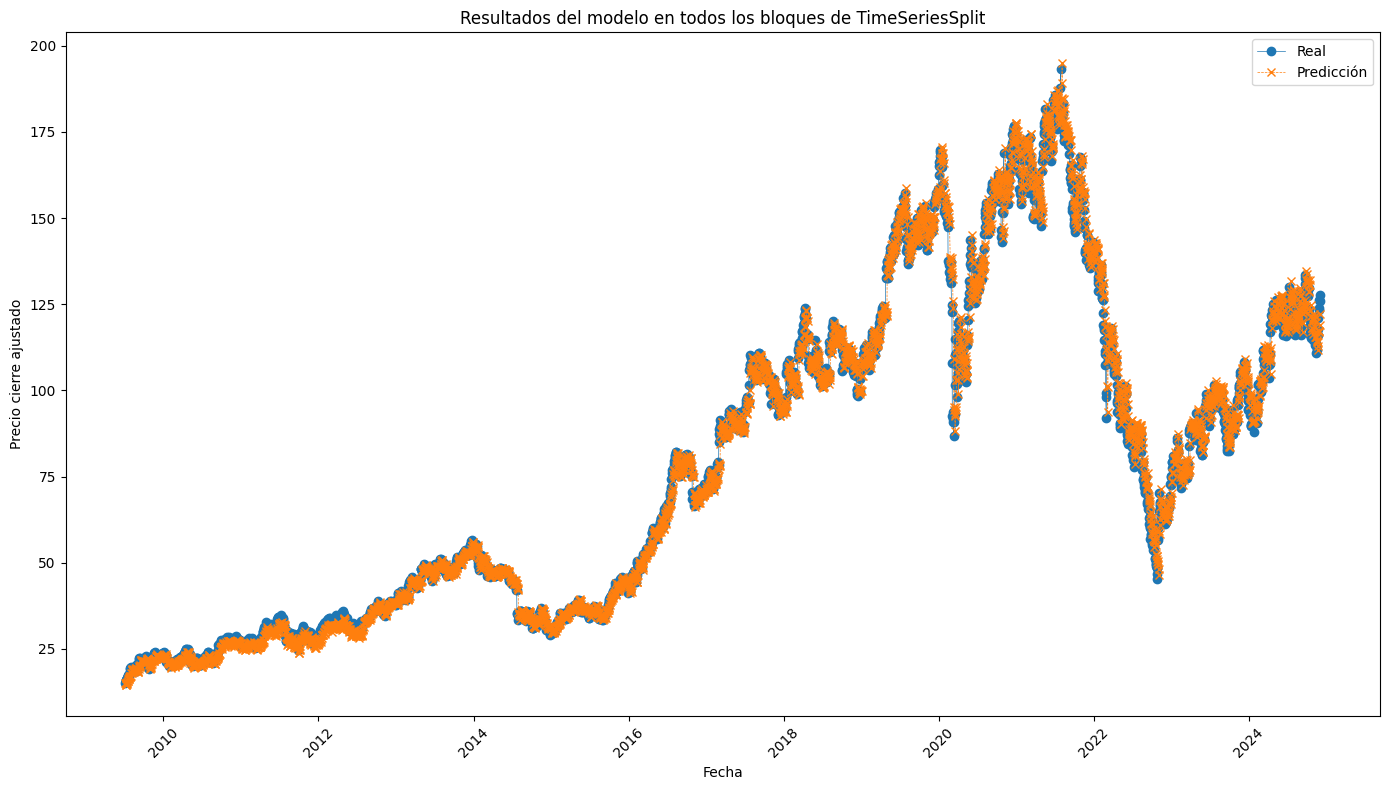

In [80]:
# Gráfico
plt.figure(figsize=(14, 8)) 
plt.plot(all_dates, all_y_true, label='Real', marker='o', linestyle='-', linewidth=0.5)
plt.plot(all_dates, all_y_pred, label='Predicción', marker='x', linestyle='--', linewidth=0.5)
plt.title('Resultados del modelo en todos los bloques de TimeSeriesSplit')
plt.xlabel('Fecha')
plt.ylabel('Precio cierre ajustado')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
#Separacion de variables en predictoras y objetivo
#X = data[['Adj_Close', 'High', 'Close', 'Open', 'Low']]
#y = data['Adj_Close_Prediction']

In [82]:
# Inicializar TimeSeriesSplit
#tscv = TimeSeriesSplit(n_splits=5)

#Separacion de datos en entrenamiento y prueba
#for train_index, test_index in tscv.split(X):
 #   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  #  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [83]:
# Aplicacion del modelo de Regresion Lineal
#model = LinearRegression()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

In [84]:
# Evaluación de resultados
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.9462605707943902
MAE: 4.15
RMSE: 5.30


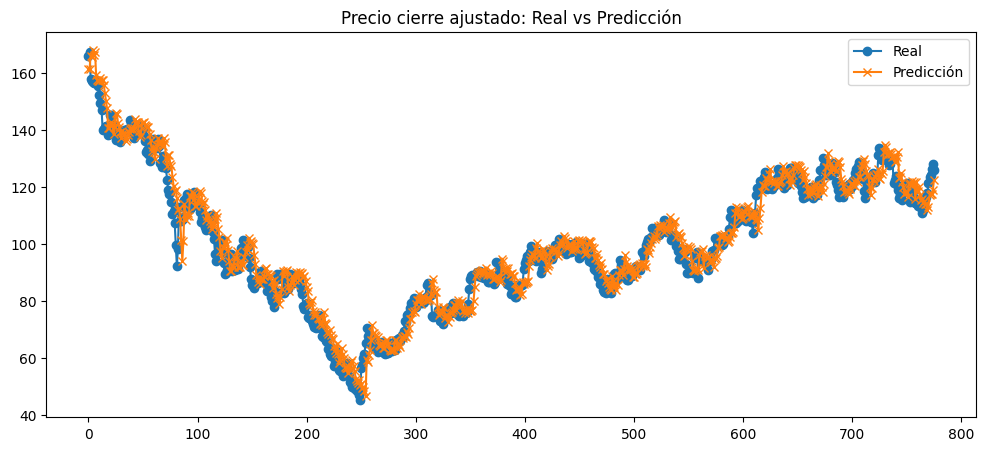

In [85]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Real', marker='o')
plt.plot(y_pred, label='Predicción', marker='x')
plt.title('Precio cierre ajustado: Real vs Predicción')
plt.legend()
plt.show()

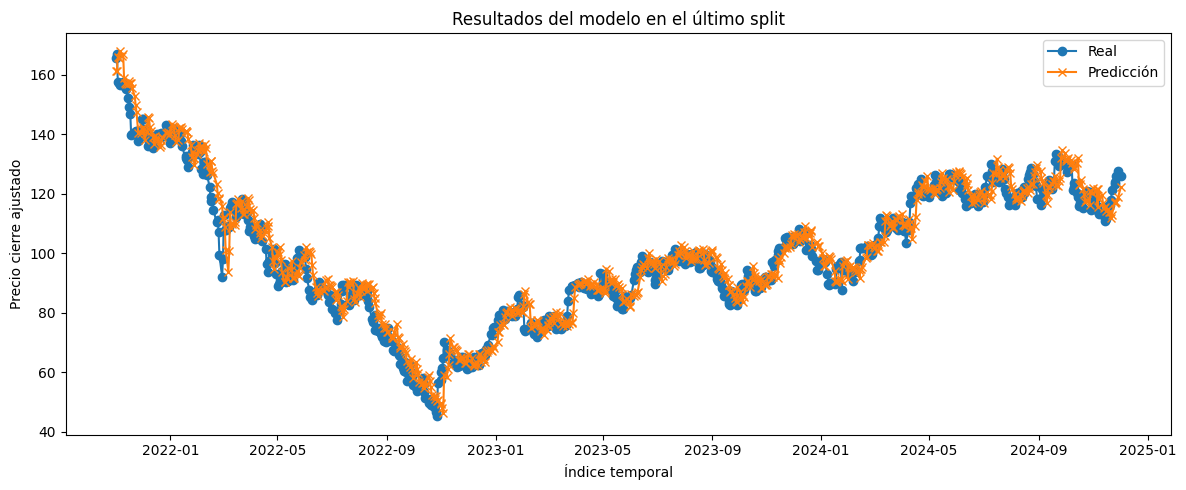

In [86]:
plt.figure(figsize=(12, 5))
plt.plot(data['Date'].iloc[test_index], y_test.values, label='Real', marker='o')
plt.plot(data['Date'].iloc[test_index], y_pred, label='Predicción', marker='x')
plt.title('Resultados del modelo en el último split')
plt.xlabel('Índice temporal')
plt.ylabel('Precio cierre ajustado')
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
# Predicciones para cada conjunto, para analizar si existe overfitting y es por eso que el modelo presenta buen desempeño
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [88]:
#Metricas para conjunto de entrenamiento
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

#Metricas para conjunto de prueba
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [89]:
print("Entrenamiento:")
print("R²:", r2_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)

print("\nTest:")
print("R²:", r2_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)


Entrenamiento:
R²: 0.9949608346684473
MAE: 1.9566944569045313
RMSE: 3.4331791931488307

Test:
R²: 0.9462605707943902
MAE: 4.149184196447936
RMSE: 5.304074803538985


In [90]:
#Dado que en ambos casos el R² es mayor a 0.95 puede concluirse que no hay un overfitting severo y que el modelo generaliza bien.
#El MAE y RMSE en test son notablemente más altos que en entrenamiento, lo que sugiere que el modelo podría estar capturando algunos detalles
#específicos del train que no se replican igual en el test. Es un leve signo de sobreajuste, pero no afecta al desempeño general del modelo..

In [91]:
X = data[['Adj_Close', 'High', 'Close', 'Open', 'Low']]
y = data['Adj_Close_Prediction']

tscv = TimeSeriesSplit(n_splits=5)

r2_scores = []
mae_scores = []
rmse_scores = []

In [92]:
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Fold {i+1} - R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Promedios
print("\n--- Promedios de métricas en validación cruzada ---")
print(f"R² promedio: {np.mean(r2_scores):.4f}")
print(f"MAE promedio: {np.mean(mae_scores):.4f}")
print(f"RMSE promedio: {np.mean(rmse_scores):.4f}")
    

Fold 1 - R²: 0.8708, MAE: 1.3609, RMSE: 1.6549
Fold 2 - R²: 0.9576, MAE: 1.0652, RMSE: 1.4391
Fold 3 - R²: 0.9835, MAE: 2.3003, RMSE: 3.1510
Fold 4 - R²: 0.9163, MAE: 4.8388, RMSE: 6.7717
Fold 5 - R²: 0.9463, MAE: 4.1492, RMSE: 5.3041

--- Promedios de métricas en validación cruzada ---
R² promedio: 0.9349
MAE promedio: 2.7429
RMSE promedio: 3.6642


In [93]:
# Dado que los folds 4 y 5 son los que presentan valores de MAE y RMSE mas elevados, esto podria interpretarse como la presencia de outliers o valores
#extremos que podrian afecar a la efectividad del modelo. 

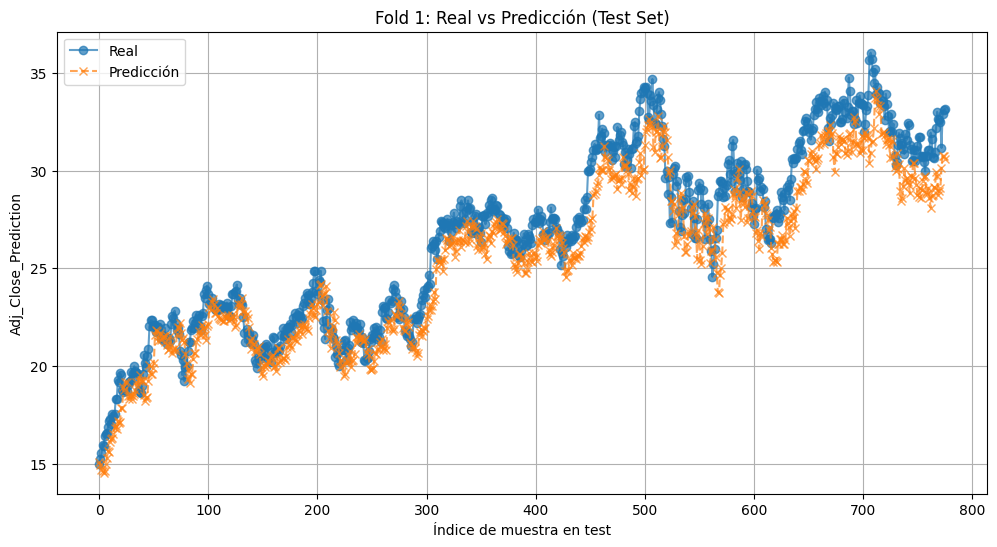

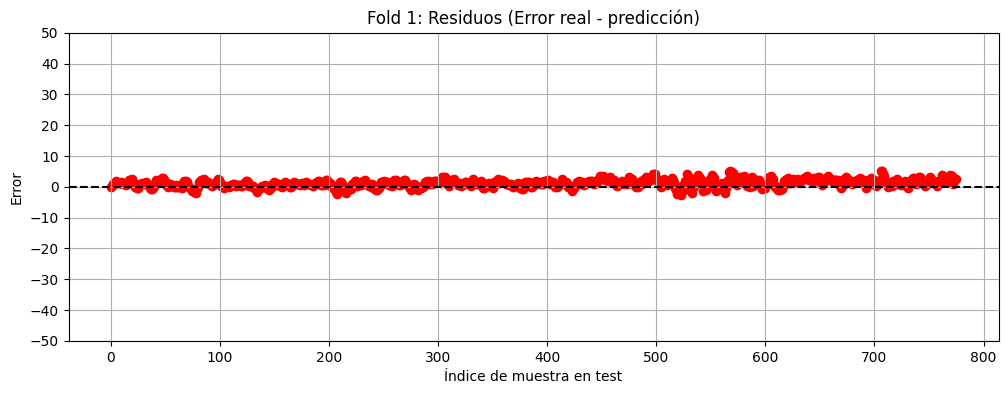

[]


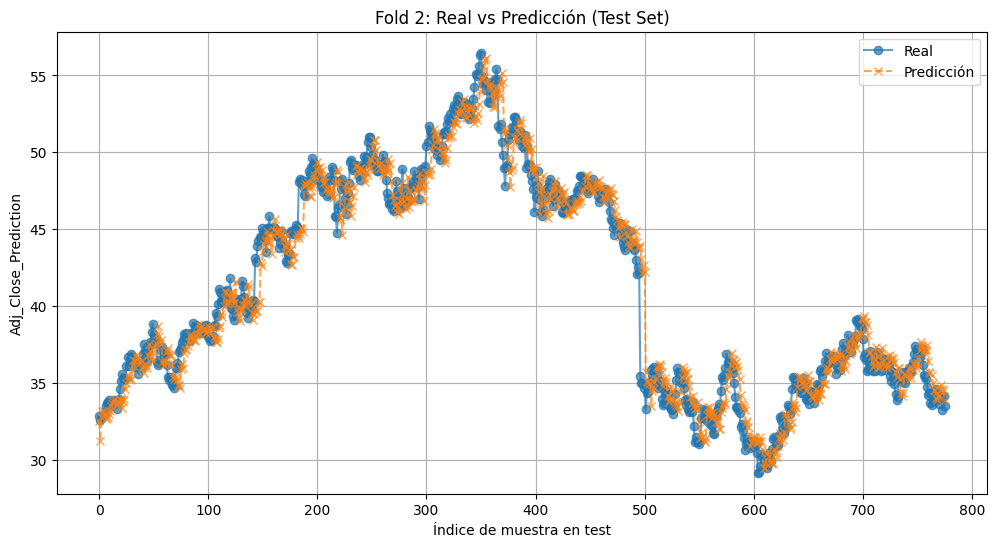

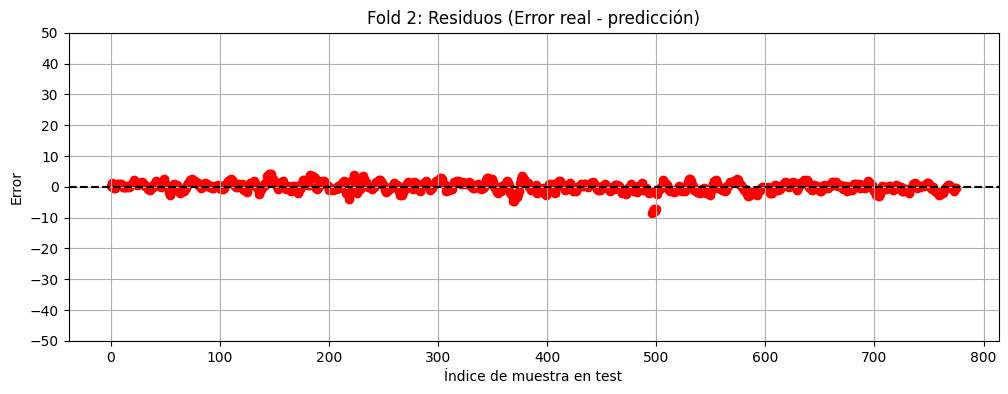

[]


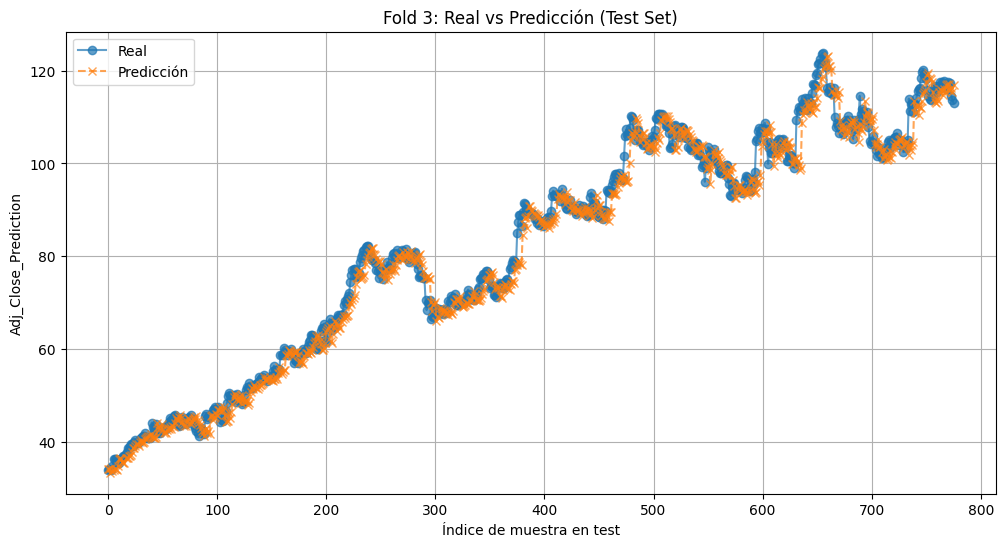

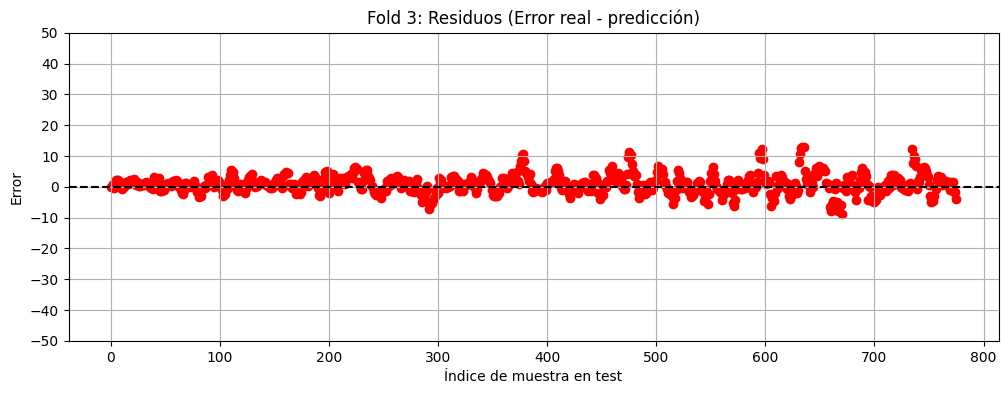

[]


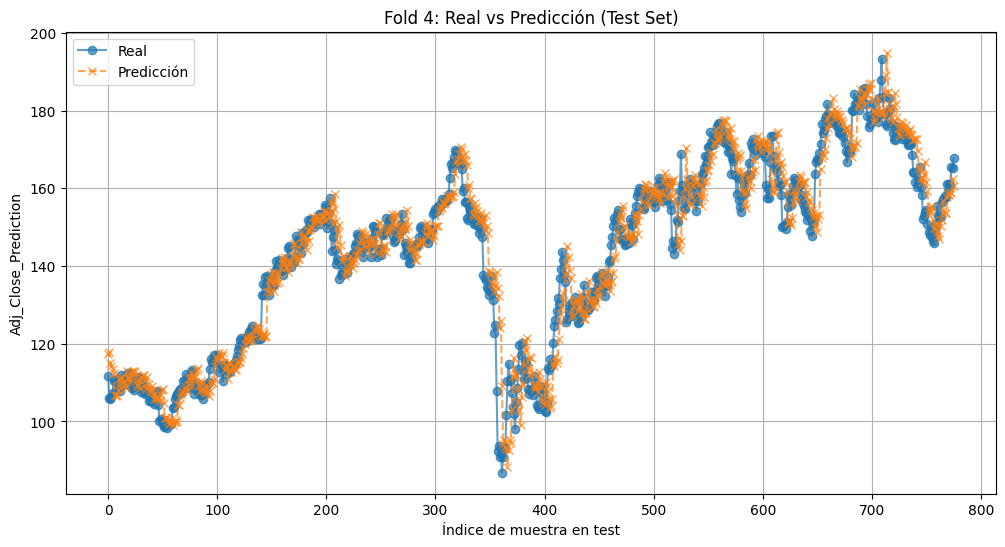

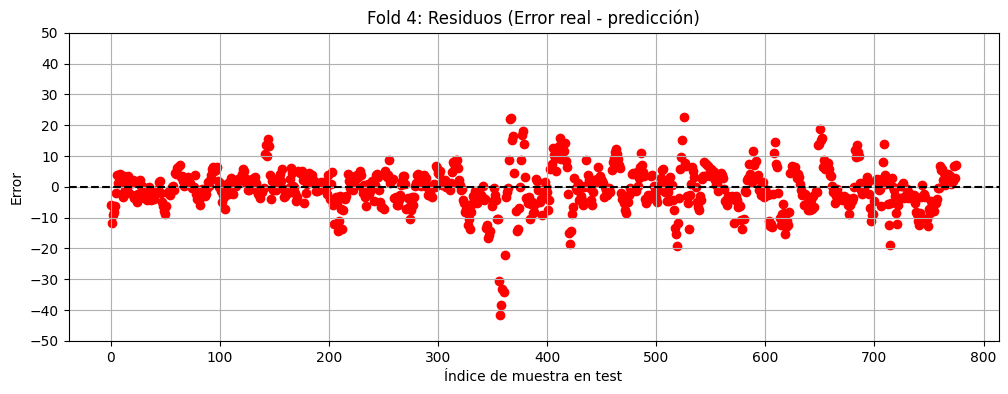

[356 357 358 359 360 361]


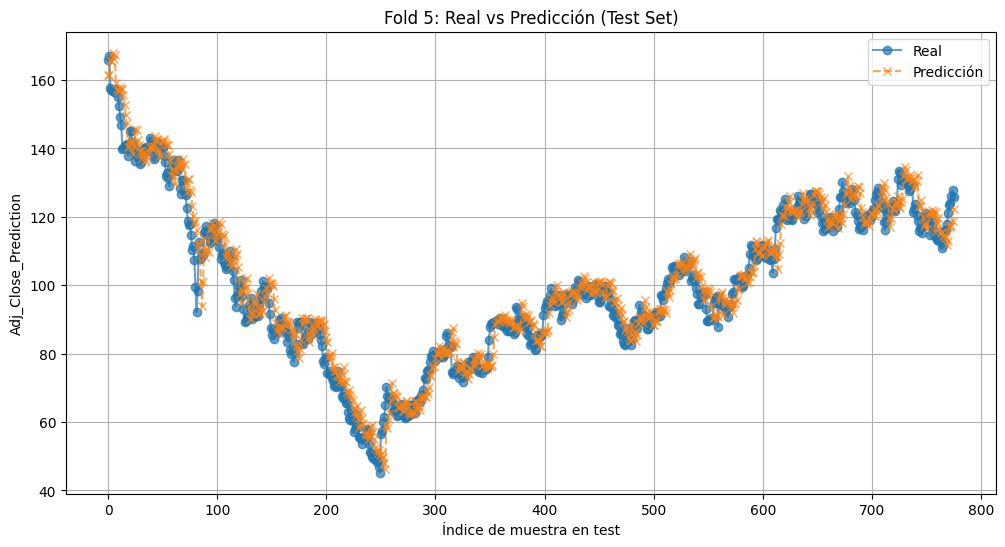

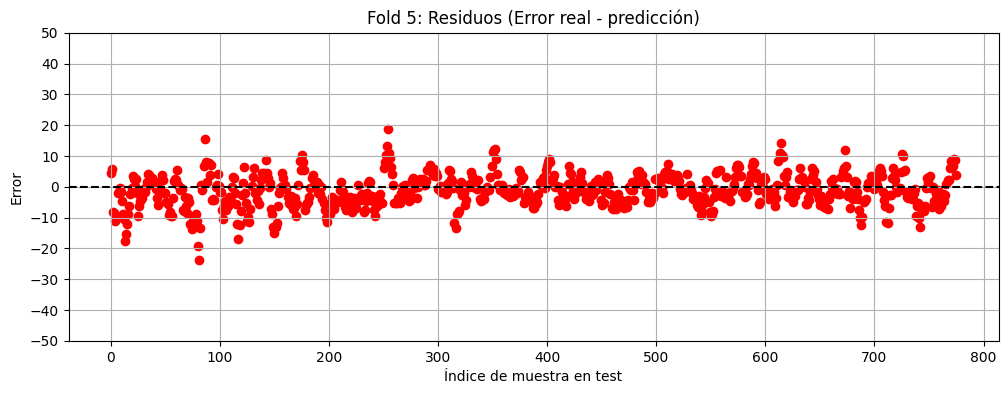

[81]


In [94]:
#Representaciones gràficas de cada subconjunto de datos a los que se aplicò el modelo

# Variables para guardar resultados
folds_plt = [0, 1, 2, 3, 4]
# Se repite el split para obtener test y predicción de esos subconjuntos específicos
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    if i in folds_plt:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        plt.figure(figsize=(12, 6))
        plt.plot(y_test.values, label='Real', marker='o', linestyle='-', alpha=0.7)
        plt.plot(y_pred, label='Predicción', marker='x', linestyle='--', alpha=0.7)
        plt.title(f'Fold {i+1}: Real vs Predicción (Test Set)')
        plt.xlabel('Índice de muestra en test')
        plt.ylabel('Adj_Close_Prediction')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Gráfico de error
        residuals = y_test.values - y_pred
        plt.figure(figsize=(12, 4))
        plt.scatter(range(len(residuals)), residuals, color='red')
        plt.ylim(-50,50)
        plt.yticks(np.arange(-50, 51, 10))
        plt.axhline(y=0, color='black', linestyle='--')
        plt.title(f'Fold {i+1}: Residuos (Error real - predicción)')
        plt.xlabel('Índice de muestra en test')
        plt.ylabel('Error')
        plt.grid(True)
        plt.show()
        indices_residuos_altos = np.where(residuals < -20)[0]
        print(indices_residuos_altos)
        

In [95]:
#En las graficas residuales, se interpreta como valores extremos a aquellos errores que estan alejados del intervalo (-10,10), teniendo mas 
#relevancia los que mas lejos se encuentren de ese intervalo. Y, por supuesto, lo optimo seria que la mayoria de los valores en las graficas de residuos
#se encuentren lo mas cerca posible al 0.

In [96]:
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    if i in folds_plt:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        residuals = y_test.values - y_pred
        indices_residuos_altos = np.where(residuals < -20)[0]
        for idx in indices_residuos_altos:
            print(f"subconjunto: {i}")
            print(f"Índice: {idx}")
            print(f"Valor real: {y_test.iloc[idx]}")
            print(f"Predicción: {y_pred[idx]}")
            print(f"Residuo: {residuals[idx]}")
            print("----")

subconjunto: 3
Índice: 356
Valor real: 107.853157
Predicción: 138.47060849501864
Residuo: -30.617451495018642
----
subconjunto: 3
Índice: 357
Valor real: 92.43042755
Predicción: 134.23221654545944
Residuo: -41.80178899545943
----
subconjunto: 3
Índice: 358
Valor real: 93.73091125
Predicción: 132.27552089527168
Residuo: -38.54460964527168
----
subconjunto: 3
Índice: 359
Valor real: 90.95654297
Predicción: 124.02549593941009
Residuo: -33.06895296941009
----
subconjunto: 3
Índice: 360
Valor real: 91.70792389
Predicción: 125.96418340739626
Residuo: -34.25625951739626
----
subconjunto: 3
Índice: 361
Valor real: 86.78538513
Predicción: 109.08103015782487
Residuo: -22.295645027824875
----
subconjunto: 4
Índice: 81
Valor real: 92.10945129
Predicción: 116.04514837960221
Residuo: -23.935697089602215
----


In [97]:
ultimas_30_pred = y_pred[-30:]  

In [98]:
tendencia = ultimas_30_pred[-1] - ultimas_30_pred[0]

if tendencia > 0:
    print(f"Se predice una subida de {tendencia:.2f} unidades en 30 días.")
else:
    print(f"Se predice una baja de {abs(tendencia):.2f} unidades en 30 días.")

Se predice una subida de 0.53 unidades en 30 días.


In [99]:
precio_actual = y_test[-30:].values[0]  # o el último precio real disponible
retorno = (ultimas_30_pred[-1] - precio_actual) / precio_actual * 100

print(f"Retorno estimado: {retorno:.2f}%")

Retorno estimado: 5.93%


In [100]:
if retorno > mae and tendencia > 0:
    print("El modelo sugiere que podría ser buen momento para invertir.")
else:
    print("El retorno no supera el margen de error.")

El modelo sugiere que podría ser buen momento para invertir.
